#                 **Predict ICC World Cup Winner in 2023 using ML Model**






Untitled design (4).png

Are you excited for the upcoming **ICC World Cup 2023**? This prestigious cricket tournament brings together the finest teams from around the globe to battle it out for the ultimate glory.

As we gear up for the thrilling matches, let’s explore the predictions and expectations for the World Cup 2023. In this Project, we will delve into the teams participating and make predictions on who might emerge victorious and lift the coveted trophy.

---



**Through this project, you will get to learn**:



*   Explore the World cup matches to gain insights
*   Explore various techniques to clean and prepare the data for Machine Learning Model
*   Leverage Machine Learning and Data analysis to prepare a model which can predict the winner of Match






---



#Setting the Environment

In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

write description about the datset

In [3]:
# Read the data from "World_cup_2023.csv" into the 'World_cup' DataFrame
data = pd.read_csv("/content/World_cup_2023.csv")

# Read the data from "results.csv" into the 'results' DataFrame
results = pd.read_csv("/content/results.csv")

# matches of 2023 World Cup
fixtures = pd.read_csv("/content/Fixtures.csv")

# Basic Data Exploration

In [4]:
# Display the first few rows of the data DataFrame.
# We can use past performance as an indicator for future performance, Which Team is more likely to win ?
data


Team_name  Team_ranking  Titles  Win_percentage_ODI  WC_matches  \
0     Australia             1       5               60.73          94   
1      Pakistan             2       1               52.78          79   
2         India             3       2               52.38          84   
3  New Zealand              4       0               45.89          89   
4       England             5       1               50.32          83   
5  South Africa             6       0               61.00          64   
6    Bangladesh             7       0               36.65          40   
7   Afghanistan             8       0               49.65          15   
8     Sri Lanka             9       1               45.74          80   
9   Netherlands            10       0               34.21          20   

   WC_match_won  Win_percent_WC  WC_match_loss  Loss_percent_WC  Tied  \
0            69           73.40             23            24.46     1   
1            45           56.96             32            40.50     0   
2            53           63.09             29            34.52     1   
3            54           60.67             33            37.07     1   
4            48           57.83             32            38.55     2   
5            38           59.37             23            35.93     2   
6            14           35.00             25            62.50     0   
7             1            6.66             14            93.33     0   
8            38           47.50             39            48.75     1   
9             2           10.00             18            90.00     0   

   No_result World_cup_winner  Recent_points  Rating  
0          1              Yes           2714     118  
1          2              Yes           2316     116  
2          1              Yes           3807     115  
3          1               No           2806     104  
4          1              Yes           2426     101  
5          1               No           1910     101  
6          1               No           2451      98  
7          0               No           1361      91  
8          2              Yes           2794      87  
9          0               No           1044      37

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team_name           10 non-null     object 
 1   Team_ranking        10 non-null     int64  
 2   Titles              10 non-null     int64  
 3   Win_percentage_ODI  10 non-null     float64
 4   WC_matches          10 non-null     int64  
 5   WC_match_won        10 non-null     int64  
 6   Win_percent_WC      10 non-null     float64
 7   WC_match_loss       10 non-null     int64  
 8   Loss_percent_WC     10 non-null     float64
 9   Tied                10 non-null     int64  
 10  No_result           10 non-null     int64  
 11  World_cup_winner    10 non-null     object 
 12  Recent_points       10 non-null     int64  
 13  Rating              10 non-null     int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.2+ KB


In [6]:
# Display the first few rows of the results.
results.head()

Date       Team_1    Team_2       Winner            Margin  \
0  17-04-2015  Bangladesh   Pakistan  Bangladesh     won by 79 runs   
1  19-04-2015  Bangladesh   Pakistan  Bangladesh   won by 7 wickets   
2  22-04-2015  Bangladesh   Pakistan  Bangladesh   won by 8 wickets   
3  08-05-2015     Ireland    England    No result         No result   
4  26-05-2015    Pakistan   Zimbabwe    Pakistan     won by 41 runs   

                          Ground  
0  Shere Bangla National Stadium  
1  Shere Bangla National Stadium  
2  Shere Bangla National Stadium  
3                    The Village  
4                Gaddafi Stadium

In [7]:
# Displaying the last few rows of the results DataFrame.
results.tail()

Date       Team_1        Team_2        Winner     Margin  \
759  06-11-2023   Bangladesh     Sri Lanka    Bangladesh  3 wickets   
760  07-11-2023  Afghanistan     Australia     Australia  3 wickets   
761  08-11-2023      England   Netherlands       England   160 runs   
762  09-11-2023  New Zealand     Sri Lanka   New Zealand  5 wickets   
763  10-11-2023  Afghanistan  South Africa  South Africa  5 wickets   

                                            Ground  
759                    Arun Jaitley Stadium, Delhi  
760                       Wankhede Stadium, Mumbai  
761  Maharashtra Cricket Association Stadium, Pune  
762    M Chinnaswamy Stadium, Bengaluru, Bangalore  
763               Narendra Modi Stadium, Ahmedabad

In [8]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    764 non-null    object
 1   Team_1  764 non-null    object
 2   Team_2  764 non-null    object
 3   Winner  764 non-null    object
 4   Margin  764 non-null    object
 5   Ground  764 non-null    object
dtypes: object(6)
memory usage: 35.9+ KB


In [9]:
fixtures.head()

# result coloum which we will be predicting

Round_number        Team_1       Team_2       Date  \
0            1       England  New Zealand  5/10/2023   
1            1     Pakistan   Netherlands  6/10/2023   
2            1    Bangladesh  Afghanistan  7/10/2023   
3            1  South Africa    Sri Lanka  7/10/2023   
4            1         India    Australia  8/10/2023   

                                            Location    Group  Result  
0                   Narendra Modi Stadium, Ahmedabad  Group A     NaN  
1      Rajiv Gandhi International Stadium, Hyderabad  Group A     NaN  
2  Himachal Pradesh Cricket Association Stadium, ...  Group A     NaN  
3                        Arun Jaitley Stadium, Delhi  Group A     NaN  
4                    MA Chidambaram Stadium, Chennai  Group A     NaN

In [10]:
data.shape

(10, 14)

In [11]:
results.shape

(764, 6)

# Exploratory Data Analysis

**Number of titles won by each teams:**

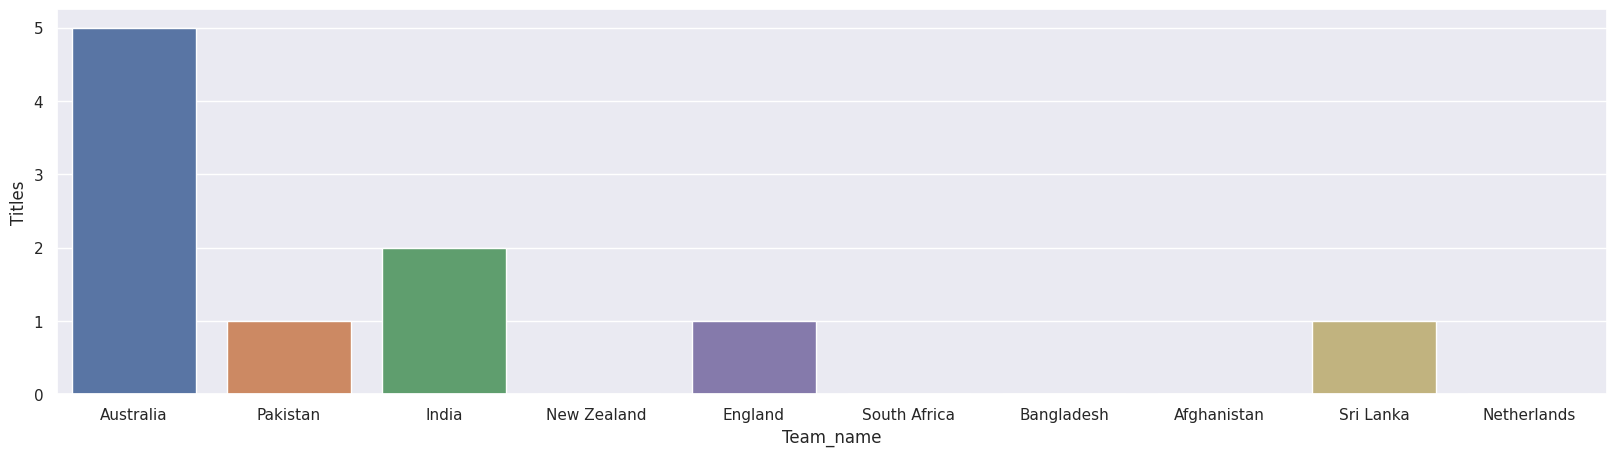

In [12]:
# Set the figure size using sns.set
sns.set(rc={'figure.figsize':(20, 5)})

# Create a bar plot using sns.barplot to visualize team titles
sns.barplot(x='Team_name', y='Titles', data=data)

# Display the plot
plt.show()


**Win percentage in ODI by each team**

In [13]:
# Set the figure size for the bar plot using Seaborn
sns.set(rc={'figure.figsize':(20, 5)})

# Create a bar plot using Seaborn
sns.barplot(x='Team_name', y='Win_percentage_ODI', data=data)

# Display the plot
plt.show()


**Total matches won in world cup by each team**

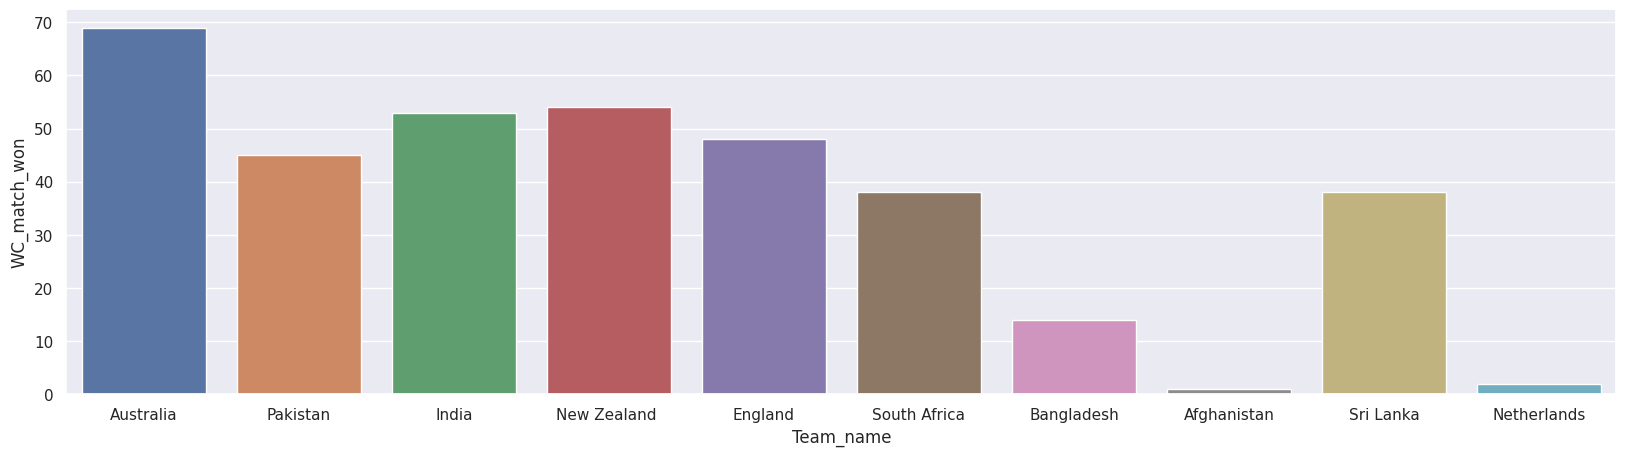

In [14]:
# Set the figure size for the bar plot using Seaborn
sns.set(rc={'figure.figsize':(20, 5)})

# Create a bar plot using Seaborn
sns.barplot(x='Team_name', y='WC_match_won', data=data)

# Display the plot
plt.show()


**Latest ICC ODI rating**

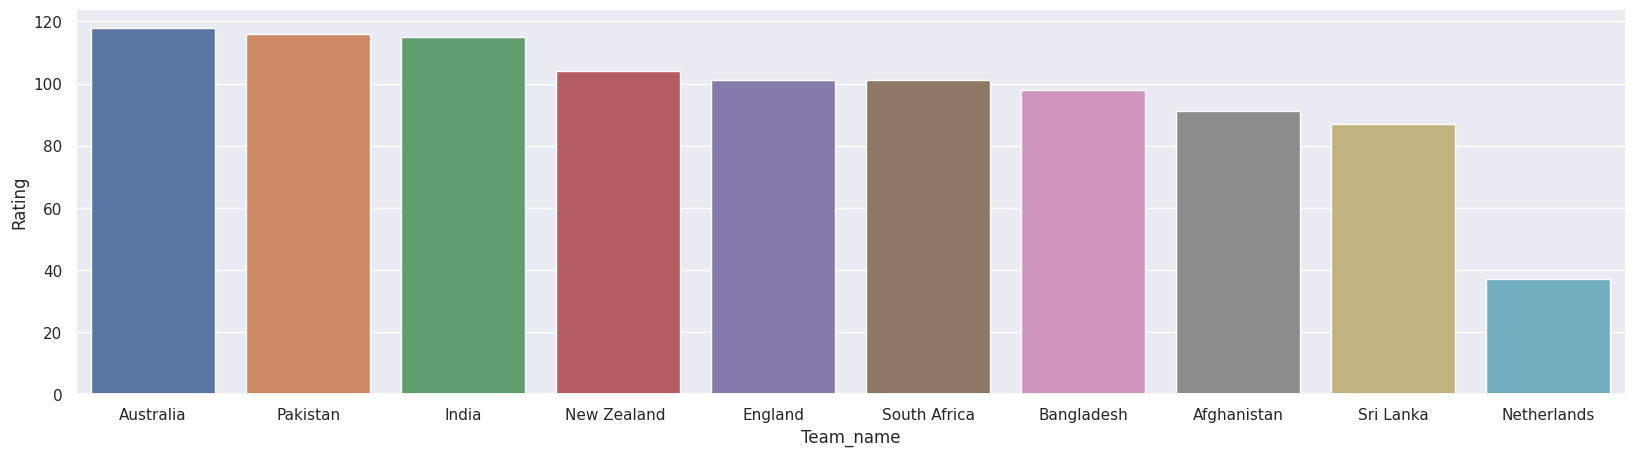

In [15]:
# Set the figure size for the bar plot using Seaborn
sns.set(rc={'figure.figsize':(20, 5)})

# Create a bar plot using Seaborn to display recent ratings of teams
sns.barplot(x='Team_name', y='Rating', data=data)

# Display the plot
plt.show()


# Data Cleaning

1. In Results.csv we have **match abandoned** and **No result** so we need to remove them

2. We can see multiple values for example india is repeating twice when we unique() this is because of Extra spaces

so we need to clean this for better prediction

In [16]:
results.Winner.unique()

array(['Bangladesh ', 'No result', 'Pakistan ', 'England ',
       'New Zealand ', 'England', 'India', 'South Africa', 'Pakistan',
       'Sri Lanka ', 'Bangladesh', 'Sri Lanka', 'Zimbabwe ',
       'New Zealand', 'Australia ', 'Australia', 'Zimbabwe', 'India ',
       'Afghanistan ', 'Afghanistan', 'Match abandoned', 'West Indies',
       'Match Tied', 'Ireland', 'South Africa ', 'Ireland ',
       'West Indies ', 'Scotland', 'Netherlands', 'Nepal', 'Netherlands '],
      dtype=object)

In [17]:
results.Winner.value_counts()

India              76
England            68
Australia          64
New Zealand        62
South Africa       55
Bangladesh         52
Pakistan           49
Sri Lanka          47
Afghanistan        44
No result          30
India              27
South Africa       18
West Indies        18
England            17
Match abandoned    17
Zimbabwe           14
Bangladesh         13
Pakistan           13
New Zealand        12
Netherlands        10
West Indies         9
Afghanistan         8
Sri Lanka           7
Ireland             7
Zimbabwe            6
Ireland             6
Australia           5
Match Tied          4
Scotland            3
Netherlands         2
Nepal               1
Name: Winner, dtype: int64

In [18]:
# Lets Remove Extra Spaces
results["Winner"] = results["Winner"].str.rstrip()

In [19]:
# Lets Verifiy The results
results.Winner.value_counts()

India              103
England             85
New Zealand         74
South Africa        73
Australia           69
Bangladesh          65
Pakistan            62
Sri Lanka           54
Afghanistan         52
No result           30
West Indies         27
Zimbabwe            20
Match abandoned     17
Ireland             13
Netherlands         12
Match Tied           4
Scotland             3
Nepal                1
Name: Winner, dtype: int64

In [20]:
# Removing rows with 'Match abandoned' and 'No result' from the 'results' DataFrame."
results.drop(results[(results['Winner'] == 'Match abandoned' )].index, inplace=True)
results.drop(results[(results['Winner'] == 'No result' )].index, inplace=True)

In [21]:
# Lets Verifiy The results
results.Winner.value_counts()

India           103
England          85
New Zealand      74
South Africa     73
Australia        69
Bangladesh       65
Pakistan         62
Sri Lanka        54
Afghanistan      52
West Indies      27
Zimbabwe         20
Ireland          13
Netherlands      12
Match Tied        4
Scotland          3
Nepal             1
Name: Winner, dtype: int64

In [22]:
results.head()

Date       Team_1    Team_2      Winner            Margin  \
0  17-04-2015  Bangladesh   Pakistan  Bangladesh    won by 79 runs   
1  19-04-2015  Bangladesh   Pakistan  Bangladesh  won by 7 wickets   
2  22-04-2015  Bangladesh   Pakistan  Bangladesh  won by 8 wickets   
4  26-05-2015    Pakistan   Zimbabwe    Pakistan    won by 41 runs   
5  29-05-2015    Pakistan   Zimbabwe    Pakistan  won by 6 wickets   

                          Ground  
0  Shere Bangla National Stadium  
1  Shere Bangla National Stadium  
2  Shere Bangla National Stadium  
4                Gaddafi Stadium  
5                Gaddafi Stadium

In [23]:
results.Winner.value_counts()
# verify Removing rows with 'Match abandoned' and 'No result' from the 'results' DataFrame."

India           103
England          85
New Zealand      74
South Africa     73
Australia        69
Bangladesh       65
Pakistan         62
Sri Lanka        54
Afghanistan      52
West Indies      27
Zimbabwe         20
Ireland          13
Netherlands      12
Match Tied        4
Scotland          3
Nepal             1
Name: Winner, dtype: int64

# India Performance in past World Cup Matches

In [24]:
# Filter the 'results' DataFrame to include rows where India played either as Team_1 or Team_2
df = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]

# Create a new DataFrame 'India' containing all rows from the filtered DataFrame
India = df.iloc[:]

# Display the first few rows of the 'India' DataFrame
India.head()

Date       Team_1 Team_2      Winner            Margin  \
11  18-06-2015   Bangladesh  India  Bangladesh    won by 79 runs   
13  21-06-2015  Bangladesh   India  Bangladesh  won by 6 wickets   
14  24-06-2015  Bangladesh   India       India    won by 77 runs   
16  10-07-2015    Zimbabwe   India       India     won by 4 runs   
19  12-07-2015    Zimbabwe   India       India    won by 62 runs   

                           Ground  
11  Shere Bangla National Stadium  
13  Shere Bangla National Stadium  
14  Shere Bangla National Stadium  
16             Harare Sports Club  
19             Harare Sports Club

In [25]:
# Filtering the 'India' dataframe to create a new dataframe 'India_win' containing rows where the 'Winner' column is 'India'.
India_win = India[India['Winner']=='India']

In [26]:

India_win

Date       Team_1        Team_2 Winner            Margin  \
14   24-06-2015  Bangladesh          India  India    won by 77 runs   
16   10-07-2015    Zimbabwe          India  India     won by 4 runs   
19   12-07-2015    Zimbabwe          India  India    won by 62 runs   
20   14-07-2015    Zimbabwe          India  India    won by 83 runs   
73   23-01-2016   Australia          India  India  won by 6 wickets   
..          ...          ...           ...    ...               ...   
738  19-10-2023        India    Bangladesh  India         7 wickets   
742  22-10-2023        India   New Zealand  India         4 wickets   
750  29-10-2023        India       England  India          100 runs   
754  02-11-2023        India     Sri Lanka  India          302 runs   
758  05-11-2023        India  South Africa  India          243 runs   

                                                Ground  
14                       Shere Bangla National Stadium  
16                                  Harare Sports Club  
19                                  Harare Sports Club  
20                                  Harare Sports Club  
73                               Sydney Cricket Ground  
..                                                 ...  
738      Maharashtra Cricket Association Stadium, Pune  
742  Himachal Pradesh Cricket Association Stadium, ...  
750  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...  
754                           Wankhede Stadium, Mumbai  
758                              Eden Gardens, Kolkata  

[81 rows x 6 columns]

In [27]:
India_win.tail()

Date Team_1        Team_2 Winner     Margin  \
738  19-10-2023  India    Bangladesh  India  7 wickets   
742  22-10-2023  India   New Zealand  India  4 wickets   
750  29-10-2023  India       England  India   100 runs   
754  02-11-2023  India     Sri Lanka  India   302 runs   
758  05-11-2023  India  South Africa  India   243 runs   

                                                Ground  
738      Maharashtra Cricket Association Stadium, Pune  
742  Himachal Pradesh Cricket Association Stadium, ...  
750  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...  
754                           Wankhede Stadium, Mumbai  
758                              Eden Gardens, Kolkata

**No.of wins in ODIs against other teams**

In [28]:
# Exclude Team India's name
excluded_value = 'India'

# Filtering out rows with the excluded value
filtered_df = India_win[India_win['Team_2'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_2'].value_counts()

# Print the value counts
print(value_counts)


Australia       7
West Indies     6
New Zealand     5
Sri Lanka       4
England         3
South Africa    3
 England        1
Afghanistan     1
Pakistan        1
Bangladesh      1
Name: Team_2, dtype: int64


In [29]:
# Exclude Team India's name
excluded_value = 'India'

# Filtering out rows with the excluded value
filtered_df = India_win[India_win['Team_1'] != excluded_value]

# Lets Remove Extra Spaces
filtered_df['Team_1'] = filtered_df['Team_1'].str.rstrip()

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_1'].value_counts()

# Print the value counts
print(value_counts)

Zimbabwe        9
West Indies     8
Sri Lanka       7
Bangladesh      6
Australia       5
South Africa    5
New Zealand     4
England         3
Hong Kong       1
Afghanistan     1
Name: Team_1, dtype: int64


<ipython-input-29-baeea5fa21f9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Team_1'] = filtered_df['Team_1'].str.rstrip()


**Displaying Team India's wins against other teams using bar graph**

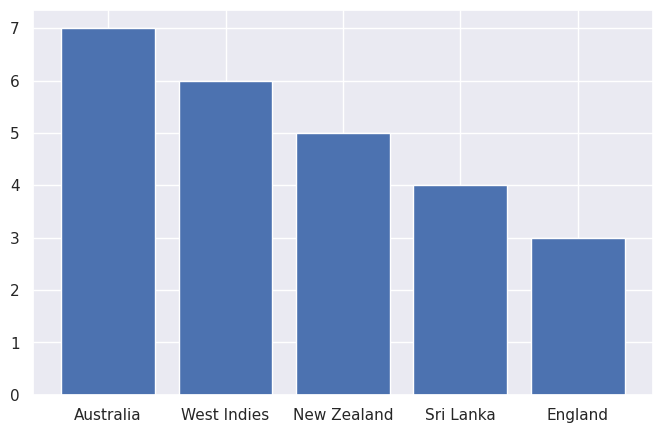

In [30]:
# Exclude Team India
exclude = 'India'

# Filter out the opponent to exclude from the data
filtered_data = India_win[India_win['Team_2'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by India.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_2'].value_counts()[0:5].keys()), list(filtered_data['Team_2'].value_counts()[0:5]), color="b")
plt.show()


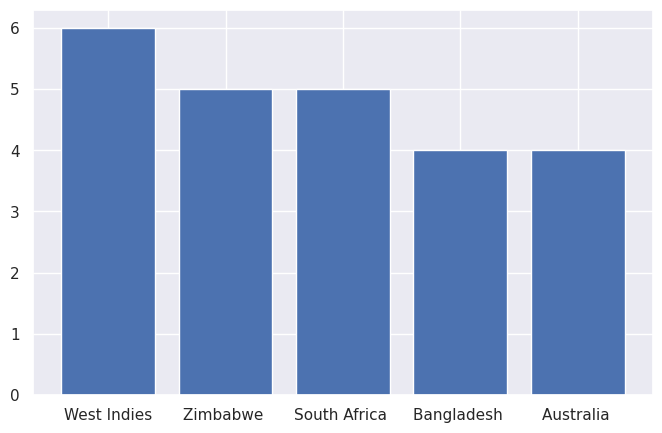

In [31]:
# Exclude Team India
exclude = 'India'

# Filter out the opponent to exclude from the data
filtered_data = India_win[India_win['Team_1'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by India.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_1'].value_counts()[0:5].keys()), list(filtered_data['Team_1'].value_counts()[0:5]), color="b")
plt.show()



# prepare the Data Model

lets remove whitespaces present in team names

In [32]:
data.head()

Team_name  Team_ranking  Titles  Win_percentage_ODI  WC_matches  \
0     Australia             1       5               60.73          94   
1      Pakistan             2       1               52.78          79   
2         India             3       2               52.38          84   
3  New Zealand              4       0               45.89          89   
4       England             5       1               50.32          83   

   WC_match_won  Win_percent_WC  WC_match_loss  Loss_percent_WC  Tied  \
0            69           73.40             23            24.46     1   
1            45           56.96             32            40.50     0   
2            53           63.09             29            34.52     1   
3            54           60.67             33            37.07     1   
4            48           57.83             32            38.55     2   

   No_result World_cup_winner  Recent_points  Rating  
0          1              Yes           2714     118  
1          2              Yes           2316     116  
2          1              Yes           3807     115  
3          1               No           2806     104  
4          1              Yes           2426     101

In [33]:
results.head()

Date       Team_1    Team_2      Winner            Margin  \
0  17-04-2015  Bangladesh   Pakistan  Bangladesh    won by 79 runs   
1  19-04-2015  Bangladesh   Pakistan  Bangladesh  won by 7 wickets   
2  22-04-2015  Bangladesh   Pakistan  Bangladesh  won by 8 wickets   
4  26-05-2015    Pakistan   Zimbabwe    Pakistan    won by 41 runs   
5  29-05-2015    Pakistan   Zimbabwe    Pakistan  won by 6 wickets   

                          Ground  
0  Shere Bangla National Stadium  
1  Shere Bangla National Stadium  
2  Shere Bangla National Stadium  
4                Gaddafi Stadium  
5                Gaddafi Stadium

In [34]:
import re

def remove_whitespace(input_string):
  return input_string.strip()

In [35]:
data['Team_name'] = data['Team_name'].apply(lambda x: remove_whitespace(x))

In [36]:
results['Team_1'] = results['Team_1'].apply(lambda x: remove_whitespace(x))
results['Team_2'] = results['Team_2'].apply(lambda x: remove_whitespace(x))

Now there are ten teams quality for this year ICC World Cup, so we need to select those matches only

In [102]:
# This is a list of cricket teams participating in the world cup.
worldcup_teams = ['England', ' South Africa', '', 'West Indies',
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan',
            'Australia', 'Bangladesh', 'India']

In [103]:
# Filtering matches involving only teams in the 'worldcup_teams' list
df_teams_1 = results[results['Team_1'].isin(worldcup_teams)]  # Extracts matches with Team_1 in 'worldcup_teams'
df_teams_2 = results[results['Team_2'].isin(worldcup_teams)]  # Extracts matches with Team_2 in 'worldcup_teams'


In [104]:
teams = pd.concat((df_teams_1,df_teams_2))

**check duplicates**

In [105]:
print(teams.duplicated().value_counts())
teams.drop_duplicates(inplace = True)
print(len(teams))

False    694
True     418
dtype: int64
694


**Checking missing value**

In [106]:
teams.isnull().sum()

Date      0
Team_1    0
Team_2    0
Winner    0
Margin    0
Ground    0
dtype: int64

In [107]:

# Displaying the first few rows of the "teams" DataFrame.

teams.head()

Date      Team_1    Team_2      Winner            Margin  \
0  17-04-2015  Bangladesh  Pakistan  Bangladesh    won by 79 runs   
1  19-04-2015  Bangladesh  Pakistan  Bangladesh  won by 7 wickets   
2  22-04-2015  Bangladesh  Pakistan  Bangladesh  won by 8 wickets   
4  26-05-2015    Pakistan  Zimbabwe    Pakistan    won by 41 runs   
5  29-05-2015    Pakistan  Zimbabwe    Pakistan  won by 6 wickets   

                          Ground  
0  Shere Bangla National Stadium  
1  Shere Bangla National Stadium  
2  Shere Bangla National Stadium  
4                Gaddafi Stadium  
5                Gaddafi Stadium

In [108]:
# Removing unnecessary columns from df_teams and displaying the first few rows of the updated dataframe.
teams = teams.drop(['Date','Margin', 'Ground'], axis=1)
teams.head()

Team_1    Team_2      Winner
0  Bangladesh  Pakistan  Bangladesh
1  Bangladesh  Pakistan  Bangladesh
2  Bangladesh  Pakistan  Bangladesh
4    Pakistan  Zimbabwe    Pakistan
5    Pakistan  Zimbabwe    Pakistan

 define a function to update the winner column

In [109]:
def update_winner(row):
  if str(row['Team_1'].lower().strip()) == str(row['Winner'].lower().strip()):
    return 'Team_1'
  else:
    return 'Team_2'


In [110]:
teams['Winner']=teams.apply(lambda x: update_winner(x),axis=1)

In [111]:
teams

Team_1       Team_2  Winner
0      Bangladesh     Pakistan  Team_1
1      Bangladesh     Pakistan  Team_1
2      Bangladesh     Pakistan  Team_1
4        Pakistan     Zimbabwe  Team_1
5        Pakistan     Zimbabwe  Team_1
..            ...          ...     ...
720   Netherlands    Sri Lanka  Team_2
723   Netherlands     Pakistan  Team_2
725  South Africa    Sri Lanka  Team_1
727   Netherlands  New Zealand  Team_2
740   Netherlands    Sri Lanka  Team_2

[694 rows x 3 columns]

In [112]:
def modify_data(left_data,team_text):
  right_data=data[['Team_name','Team_ranking','Titles','Win_percentage_ODI','WC_matches','WC_match_won','Win_percent_WC','WC_match_loss','Loss_percent_WC','Recent_points','Rating']]
  right_data.columns=[str(col+str('_'+team_text)) for col in right_data.columns]
  merged_data = left_data.merge(right_data,left_on=team_text,right_on=str('Team_name_'+team_text),how='left')
  return merged_data

In [113]:
merged_data1=modify_data(teams,'Team_1')
merged_data2=modify_data(teams,'Team_2')


In [114]:
merged_data1.head()

Team_1    Team_2  Winner Team_name_Team_1  Team_ranking_Team_1  \
0  Bangladesh  Pakistan  Team_1       Bangladesh                  7.0   
1  Bangladesh  Pakistan  Team_1       Bangladesh                  7.0   
2  Bangladesh  Pakistan  Team_1       Bangladesh                  7.0   
3    Pakistan  Zimbabwe  Team_1         Pakistan                  2.0   
4    Pakistan  Zimbabwe  Team_1         Pakistan                  2.0   

   Titles_Team_1  Win_percentage_ODI_Team_1  WC_matches_Team_1  \
0            0.0                      36.65               40.0   
1            0.0                      36.65               40.0   
2            0.0                      36.65               40.0   
3            1.0                      52.78               79.0   
4            1.0                      52.78               79.0   

   WC_match_won_Team_1  Win_percent_WC_Team_1  WC_match_loss_Team_1  \
0                 14.0                  35.00                  25.0   
1                 14.0                  35.00                  25.0   
2                 14.0                  35.00                  25.0   
3                 45.0                  56.96                  32.0   
4                 45.0                  56.96                  32.0   

   Loss_percent_WC_Team_1  Recent_points_Team_1  Rating_Team_1  
0                    62.5                2451.0           98.0  
1                    62.5                2451.0           98.0  
2                    62.5                2451.0           98.0  
3                    40.5                2316.0          116.0  
4                    40.5                2316.0          116.0

In [115]:
merged_data2.head()

Team_1    Team_2  Winner Team_name_Team_2  Team_ranking_Team_2  \
0  Bangladesh  Pakistan  Team_1         Pakistan                  2.0   
1  Bangladesh  Pakistan  Team_1         Pakistan                  2.0   
2  Bangladesh  Pakistan  Team_1         Pakistan                  2.0   
3    Pakistan  Zimbabwe  Team_1              NaN                  NaN   
4    Pakistan  Zimbabwe  Team_1              NaN                  NaN   

   Titles_Team_2  Win_percentage_ODI_Team_2  WC_matches_Team_2  \
0            1.0                      52.78               79.0   
1            1.0                      52.78               79.0   
2            1.0                      52.78               79.0   
3            NaN                        NaN                NaN   
4            NaN                        NaN                NaN   

   WC_match_won_Team_2  Win_percent_WC_Team_2  WC_match_loss_Team_2  \
0                 45.0                  56.96                  32.0   
1                 45.0                  56.96                  32.0   
2                 45.0                  56.96                  32.0   
3                  NaN                    NaN                   NaN   
4                  NaN                    NaN                   NaN   

   Loss_percent_WC_Team_2  Recent_points_Team_2  Rating_Team_2  
0                    40.5                2316.0          116.0  
1                    40.5                2316.0          116.0  
2                    40.5                2316.0          116.0  
3                     NaN                   NaN            NaN  
4                     NaN                   NaN            NaN

lets select specific coloums

In [116]:
merged_data2=merged_data2[['Team_ranking_Team_2','Titles_Team_2','Win_percentage_ODI_Team_2','WC_matches_Team_2','WC_match_won_Team_2','Win_percent_WC_Team_2','WC_match_loss_Team_2','Loss_percent_WC_Team_2','Recent_points_Team_2','Rating_Team_2']]

In [117]:
merged_data=pd.concat([merged_data1,merged_data2],axis=1)

In [121]:
merged_data.head()

Team_1    Team_2  Winner Team_name_Team_1  Team_ranking_Team_1  \
0  Bangladesh  Pakistan  Team_1       Bangladesh                  7.0   
1  Bangladesh  Pakistan  Team_1       Bangladesh                  7.0   
2  Bangladesh  Pakistan  Team_1       Bangladesh                  7.0   
3    Pakistan  Zimbabwe  Team_1         Pakistan                  2.0   
4    Pakistan  Zimbabwe  Team_1         Pakistan                  2.0   

   Titles_Team_1  Win_percentage_ODI_Team_1  WC_matches_Team_1  \
0            0.0                      36.65               40.0   
1            0.0                      36.65               40.0   
2            0.0                      36.65               40.0   
3            1.0                      52.78               79.0   
4            1.0                      52.78               79.0   

   WC_match_won_Team_1  Win_percent_WC_Team_1  ...  Team_ranking_Team_2  \
0                 14.0                  35.00  ...                  2.0   
1                 14.0                  35.00  ...                  2.0   
2                 14.0                  35.00  ...                  2.0   
3                 45.0                  56.96  ...                  NaN   
4                 45.0                  56.96  ...                  NaN   

   Titles_Team_2  Win_percentage_ODI_Team_2  WC_matches_Team_2  \
0            1.0                      52.78               79.0   
1            1.0                      52.78               79.0   
2            1.0                      52.78               79.0   
3            NaN                        NaN                NaN   
4            NaN                        NaN                NaN   

   WC_match_won_Team_2  Win_percent_WC_Team_2  WC_match_loss_Team_2  \
0                 45.0                  56.96                  32.0   
1                 45.0                  56.96                  32.0   
2                 45.0                  56.96                  32.0   
3                  NaN                    NaN                   NaN   
4                  NaN                    NaN                   NaN   

   Loss_percent_WC_Team_2  Recent_points_Team_2  Rating_Team_2  
0                    40.5                2316.0          116.0  
1                    40.5                2316.0          116.0  
2                    40.5                2316.0          116.0  
3                     NaN                   NaN            NaN  
4                     NaN                   NaN            NaN  

[5 rows x 24 columns]

In [122]:
merged_data=merged_data.drop(['Team_1','Team_2','Team_name_Team_1'],axis=1)

In [123]:
# instead of using Team names as inputs to the model, which is irrelevant for the model, since names does not indicate performance
# we used the past performance of the team as respresentation of the team
merged_data.head()

Winner  Team_ranking_Team_1  Titles_Team_1  Win_percentage_ODI_Team_1  \
0  Team_1                  7.0            0.0                      36.65   
1  Team_1                  7.0            0.0                      36.65   
2  Team_1                  7.0            0.0                      36.65   
3  Team_1                  2.0            1.0                      52.78   
4  Team_1                  2.0            1.0                      52.78   

   WC_matches_Team_1  WC_match_won_Team_1  Win_percent_WC_Team_1  \
0               40.0                 14.0                  35.00   
1               40.0                 14.0                  35.00   
2               40.0                 14.0                  35.00   
3               79.0                 45.0                  56.96   
4               79.0                 45.0                  56.96   

   WC_match_loss_Team_1  Loss_percent_WC_Team_1  Recent_points_Team_1  ...  \
0                  25.0                    62.5                2451.0  ...   
1                  25.0                    62.5                2451.0  ...   
2                  25.0                    62.5                2451.0  ...   
3                  32.0                    40.5                2316.0  ...   
4                  32.0                    40.5                2316.0  ...   

   Team_ranking_Team_2  Titles_Team_2  Win_percentage_ODI_Team_2  \
0                  2.0            1.0                      52.78   
1                  2.0            1.0                      52.78   
2                  2.0            1.0                      52.78   
3                  NaN            NaN                        NaN   
4                  NaN            NaN                        NaN   

   WC_matches_Team_2  WC_match_won_Team_2  Win_percent_WC_Team_2  \
0               79.0                 45.0                  56.96   
1               79.0                 45.0                  56.96   
2               79.0                 45.0                  56.96   
3                NaN                  NaN                    NaN   
4                NaN                  NaN                    NaN   

   WC_match_loss_Team_2  Loss_percent_WC_Team_2  Recent_points_Team_2  \
0                  32.0                    40.5                2316.0   
1                  32.0                    40.5                2316.0   
2                  32.0                    40.5                2316.0   
3                   NaN                     NaN                   NaN   
4                   NaN                     NaN                   NaN   

   Rating_Team_2  
0          116.0  
1          116.0  
2          116.0  
3            NaN  
4            NaN  

[5 rows x 21 columns]

In [124]:
merged_data.tail()

Winner  Team_ranking_Team_1  Titles_Team_1  Win_percentage_ODI_Team_1  \
689  Team_2                 10.0            0.0                      34.21   
690  Team_2                 10.0            0.0                      34.21   
691  Team_1                  6.0            0.0                      61.00   
692  Team_2                 10.0            0.0                      34.21   
693  Team_2                 10.0            0.0                      34.21   

     WC_matches_Team_1  WC_match_won_Team_1  Win_percent_WC_Team_1  \
689               20.0                  2.0                  10.00   
690               20.0                  2.0                  10.00   
691               64.0                 38.0                  59.37   
692               20.0                  2.0                  10.00   
693               20.0                  2.0                  10.00   

     WC_match_loss_Team_1  Loss_percent_WC_Team_1  Recent_points_Team_1  ...  \
689                  18.0                   90.00                1044.0  ...   
690                  18.0                   90.00                1044.0  ...   
691                  23.0                   35.93                1910.0  ...   
692                  18.0                   90.00                1044.0  ...   
693                  18.0                   90.00                1044.0  ...   

     Team_ranking_Team_2  Titles_Team_2  Win_percentage_ODI_Team_2  \
689                  9.0            1.0                      45.74   
690                  2.0            1.0                      52.78   
691                  9.0            1.0                      45.74   
692                  4.0            0.0                      45.89   
693                  9.0            1.0                      45.74   

     WC_matches_Team_2  WC_match_won_Team_2  Win_percent_WC_Team_2  \
689               80.0                 38.0                  47.50   
690               79.0                 45.0                  56.96   
691               80.0                 38.0                  47.50   
692               89.0                 54.0                  60.67   
693               80.0                 38.0                  47.50   

     WC_match_loss_Team_2  Loss_percent_WC_Team_2  Recent_points_Team_2  \
689                  39.0                   48.75                2794.0   
690                  32.0                   40.50                2316.0   
691                  39.0                   48.75                2794.0   
692                  33.0                   37.07                2806.0   
693                  39.0                   48.75                2794.0   

     Rating_Team_2  
689           87.0  
690          116.0  
691           87.0  
692          104.0  
693           87.0  

[5 rows x 21 columns]

In [125]:
merged_data.fillna(0,inplace=True)

In [126]:
merged_data['Winner']=merged_data['Winner'].map({"Team_1":0,"Team_2":1})

In [127]:
merged_data.head()

Winner  Team_ranking_Team_1  Titles_Team_1  Win_percentage_ODI_Team_1  \
0       0                  7.0            0.0                      36.65   
1       0                  7.0            0.0                      36.65   
2       0                  7.0            0.0                      36.65   
3       0                  2.0            1.0                      52.78   
4       0                  2.0            1.0                      52.78   

   WC_matches_Team_1  WC_match_won_Team_1  Win_percent_WC_Team_1  \
0               40.0                 14.0                  35.00   
1               40.0                 14.0                  35.00   
2               40.0                 14.0                  35.00   
3               79.0                 45.0                  56.96   
4               79.0                 45.0                  56.96   

   WC_match_loss_Team_1  Loss_percent_WC_Team_1  Recent_points_Team_1  ...  \
0                  25.0                    62.5                2451.0  ...   
1                  25.0                    62.5                2451.0  ...   
2                  25.0                    62.5                2451.0  ...   
3                  32.0                    40.5                2316.0  ...   
4                  32.0                    40.5                2316.0  ...   

   Team_ranking_Team_2  Titles_Team_2  Win_percentage_ODI_Team_2  \
0                  2.0            1.0                      52.78   
1                  2.0            1.0                      52.78   
2                  2.0            1.0                      52.78   
3                  0.0            0.0                       0.00   
4                  0.0            0.0                       0.00   

   WC_matches_Team_2  WC_match_won_Team_2  Win_percent_WC_Team_2  \
0               79.0                 45.0                  56.96   
1               79.0                 45.0                  56.96   
2               79.0                 45.0                  56.96   
3                0.0                  0.0                   0.00   
4                0.0                  0.0                   0.00   

   WC_match_loss_Team_2  Loss_percent_WC_Team_2  Recent_points_Team_2  \
0                  32.0                    40.5                2316.0   
1                  32.0                    40.5                2316.0   
2                  32.0                    40.5                2316.0   
3                   0.0                     0.0                   0.0   
4                   0.0                     0.0                   0.0   

   Rating_Team_2  
0          116.0  
1          116.0  
2          116.0  
3            0.0  
4            0.0  

[5 rows x 21 columns]

# Training and testing the data

In [128]:
# Importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [129]:
X = merged_data.drop(['Winner'],axis=1)
y = merged_data['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Applying Random forest classifier algorithm

In [130]:
# Import the Random forest module from sklearn
from sklearn.ensemble import RandomForestClassifier

# Create an Random forest classifier with a linear kernel
rf = RandomForestClassifier(n_estimators=100, max_depth=6,
                              random_state=0)

# Fit the classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
pred = rf.predict(X_test)

# Calculating training set score:
score = rf.score(X_train, y_train)

# Calculating test set score:
score2 = rf.score(X_test, y_test)

# Printing the training set accuracy with 3 decimal places
print("Training set accuracy: ", '%.3f'%(score))

# Printing the test set accuracy with 3 decimal places
print("Test set accuracy: ", '%.3f'%(score2))


Training set accuracy:  0.730
Test set accuracy:  0.771


Once the model build now we can apply that model to predict on unseen data which is test data

In [131]:
fixtures.head()

Round_number        Team_1       Team_2       Date  \
0            1       England  New Zealand  5/10/2023   
1            1      Pakistan  Netherlands  6/10/2023   
2            1    Bangladesh  Afghanistan  7/10/2023   
3            1  South Africa    Sri Lanka  7/10/2023   
4            1         India    Australia  8/10/2023   

                                            Location    Group  Result  
0                   Narendra Modi Stadium, Ahmedabad  Group A     NaN  
1      Rajiv Gandhi International Stadium, Hyderabad  Group A     NaN  
2  Himachal Pradesh Cricket Association Stadium, ...  Group A     NaN  
3                        Arun Jaitley Stadium, Delhi  Group A     NaN  
4                    MA Chidambaram Stadium, Chennai  Group A     NaN

In [132]:
fixtures.tail()

Round_number        Team_1       Team_2        Date  \
40            1   New Zealand    Sri Lanka   9/11/2023   
41            1  South Africa  Afghanistan  10/11/2023   
42            1         India  Netherlands  11/11/2023   
43            1     Australia   Bangladesh  12/11/2023   
44            1       England     Pakistan  12/11/2023   

                                         Location    Group  Result  
40               M.Chinnaswamy Stadium, Bengaluru  Group A     NaN  
41               Narendra Modi Stadium, Ahmedabad  Group A     NaN  
42               M.Chinnaswamy Stadium, Bengaluru  Group A     NaN  
43  Maharashtra Cricket Association Stadium, Pune  Group A     NaN  
44                          Eden Gardens, Kolkata  Group A     NaN

In the fixture Dataframe we dont need last three rows

first we will try to predict which four team will go into semi final, so for now we will remove those rows

In [133]:
fixtures=fixtures[:45]

Again remove the white space from team_name

In [134]:
fixtures['Team_1'] = fixtures['Team_1'].apply(lambda x: remove_whitespace(x))
fixtures['Team_2'] = fixtures['Team_2'].apply(lambda x: remove_whitespace(x))

we have to do the same cleaning and preparing steps for test data as well which we done in train data

In [135]:
fixture=fixtures[['Team_1','Team_2']]

In [136]:
test_merged_data1=modify_data(fixture,'Team_1')
test_merged_data2=modify_data(fixture,'Team_2')

test_merged_data2=test_merged_data2[['Team_ranking_Team_2','Titles_Team_2','Win_percentage_ODI_Team_2','WC_matches_Team_2','WC_match_won_Team_2','Win_percent_WC_Team_2','WC_match_loss_Team_2','Loss_percent_WC_Team_2','Recent_points_Team_2','Rating_Team_2']]
test_merged_data=pd.concat([test_merged_data1,test_merged_data2],axis=1)
test_merged_data=test_merged_data.drop(['Team_1','Team_2','Team_name_Team_1'],axis=1)
test_merged_data.head()

Team_ranking_Team_1  Titles_Team_1  Win_percentage_ODI_Team_1  \
0                    5              1                      50.32   
1                    2              1                      52.78   
2                    7              0                      36.65   
3                    6              0                      61.00   
4                    3              2                      52.38   

   WC_matches_Team_1  WC_match_won_Team_1  Win_percent_WC_Team_1  \
0                 83                   48                  57.83   
1                 79                   45                  56.96   
2                 40                   14                  35.00   
3                 64                   38                  59.37   
4                 84                   53                  63.09   

   WC_match_loss_Team_1  Loss_percent_WC_Team_1  Recent_points_Team_1  \
0                    32                   38.55                  2426   
1                    32                   40.50                  2316   
2                    25                   62.50                  2451   
3                    23                   35.93                  1910   
4                    29                   34.52                  3807   

   Rating_Team_1  Team_ranking_Team_2  Titles_Team_2  \
0            101                    4              0   
1            116                   10              0   
2             98                    8              0   
3            101                    9              1   
4            115                    1              5   

   Win_percentage_ODI_Team_2  WC_matches_Team_2  WC_match_won_Team_2  \
0                      45.89                 89                   54   
1                      34.21                 20                    2   
2                      49.65                 15                    1   
3                      45.74                 80                   38   
4                      60.73                 94                   69   

   Win_percent_WC_Team_2  WC_match_loss_Team_2  Loss_percent_WC_Team_2  \
0                  60.67                    33                   37.07   
1                  10.00                    18                   90.00   
2                   6.66                    14                   93.33   
3                  47.50                    39                   48.75   
4                  73.40                    23                   24.46   

   Recent_points_Team_2  Rating_Team_2  
0                  2806            104  
1                  1044             37  
2                  1361             91  
3                  2794             87  
4                  2714            118

Once the test data is reday we will feed it to model which will predict the poutput

In [137]:
predictions = rf.predict(test_merged_data)

In [141]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [142]:
fixtures['Result']= [fixtures.loc[i,'Team_1'] if prediction == 0 else fixtures.loc[i,'Team_2'] for i, prediction in enumerate(predictions)]

In [143]:
fixtures['Result'].value_counts()

India           9
England         8
New Zealand     6
Australia       6
Pakistan        5
South Africa    5
Bangladesh      3
Afghanistan     2
Sri Lanka       1
Name: Result, dtype: int64

# Semi final

Now we can see which team will go for semi final nased on above results we have to prepare for semi final

In [144]:
semi_final_data= data[['Team_name','Team_ranking','Titles','Win_percentage_ODI','WC_matches','WC_match_won','Win_percent_WC','WC_match_loss','Loss_percent_WC','Recent_points','Rating']]

In [145]:
semi_final_data_ind=semi_final_data[semi_final_data['Team_name']=='India']
semi_final_data_eng=semi_final_data[semi_final_data['Team_name']=='England']
semi_final_data_sa=semi_final_data[semi_final_data['Team_name']=='South Africa']
semi_final_data_aus=semi_final_data[semi_final_data['Team_name']=='Australia']

In [146]:
def prepare_data(df,teams):
  df=df.drop('Team_name',axis=1)
  df.columns=[col+str(teams) for col in df.columns]
  return df

In [151]:
semi_1_team_1=prepare_data(semi_final_data_ind,'_Team_1')
semi_1_team_2=prepare_data(semi_final_data_sa,'_Team_2')

In [152]:


semi_1=pd.concat([semi_1_team_1.reset_index(drop=True), semi_1_team_2.reset_index(drop=True)],axis=1)

In [153]:
semi_2_team_1=prepare_data(semi_final_data_eng,'_Team_1')
semi_2_team_2=prepare_data(semi_final_data_aus,'_Team_2')

semi_2=pd.concat([semi_2_team_1.reset_index(drop=True), semi_2_team_2.reset_index(drop=True)],axis=1)

In [154]:
# making predictions on semi final 1

rf.predict(semi_1)

array([0])

over here the prediction is Team_1 which means india will win

In [155]:
# making predictions on semi final 2

rf.predict(semi_2)

array([0])

over here the prediction is Team_1 which means England will win

Now again prepare the data between India and England

In [156]:
final_team_1=prepare_data(semi_final_data_ind,'_Team_1')
final_team_2=prepare_data(semi_final_data_eng,'_Team_2')

final=pd.concat([final_team_1.reset_index(drop=True), final_team_2.reset_index(drop=True)],axis=1)

# Making predictions on Final

In [157]:
rf.predict(final)

array([0])

**Conclusion**

Again in the final we see Team_1 will win Which is India

# **Winner**

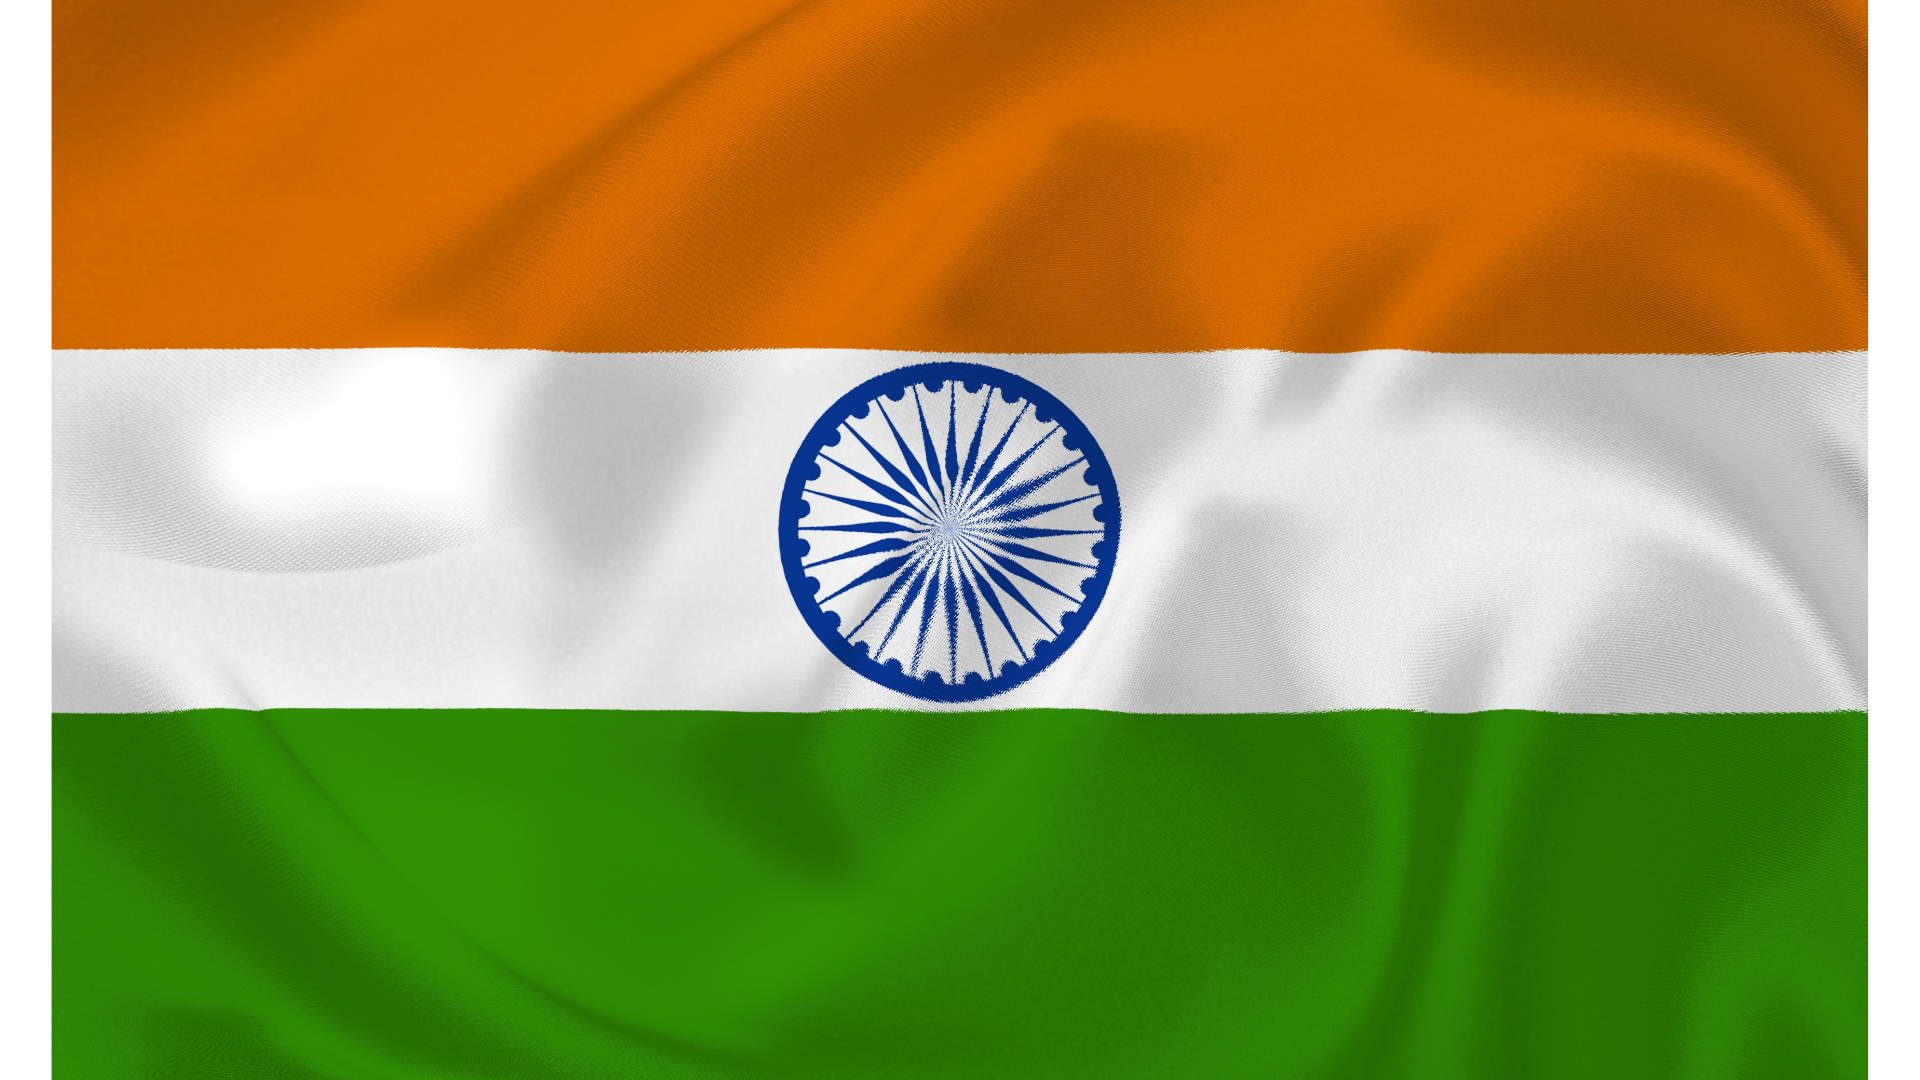